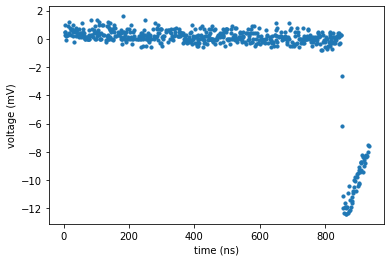

In [4]:
import matplotlib.pyplot as plt
import pylab
import numpy as np


with open("../data/Jun14Scan.txt") as f:
    events = f.read().split('-- Event')


lines = events[73].split('\n')
time = []
voltage = []
#6 - 1028
for line in lines[6:1028]:
        
    values = line.split()
    if float(values[3]) < 5:
        time.append(float(values[2]))
        voltage.append(float(values[3]))
    
plt.scatter(time,voltage,s=10)
plt.xlabel('time (ns)')
plt.ylabel('voltage (mV)')
plt.show()

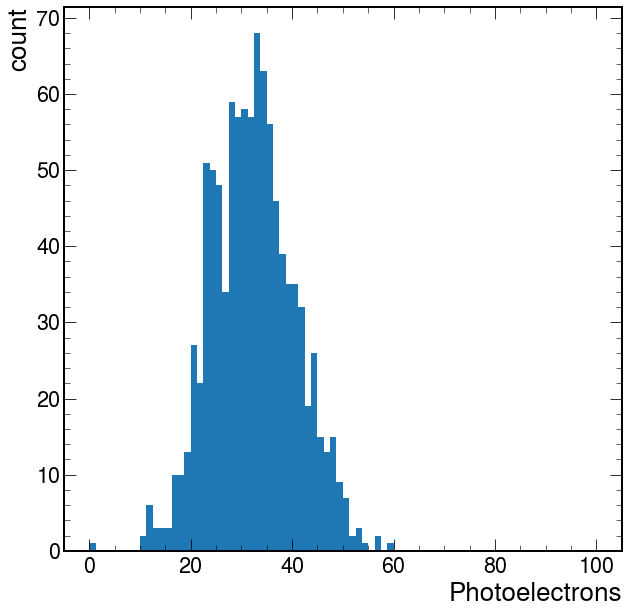

In [52]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
from matplotlib import colors
import mplhep as hep
hep.style.use(hep.style.CMS)
#hep.set_style("CMS")


with open("Jun15Scan1.txt") as f:
    points = (f.read().split('Point'))

point = points[400]
peaktopeak = []
p2ps = point.split('\n')
for p2p in p2ps:
    try:
        peaktopeak.append(float(p2p))
    except ValueError:
        x=1
plt.hist(peaktopeak,80,range=(0,100))
plt.xlabel('Photoelectrons')
plt.ylabel('count')
plt.show()

<ErrorbarContainer object of 3 artists>

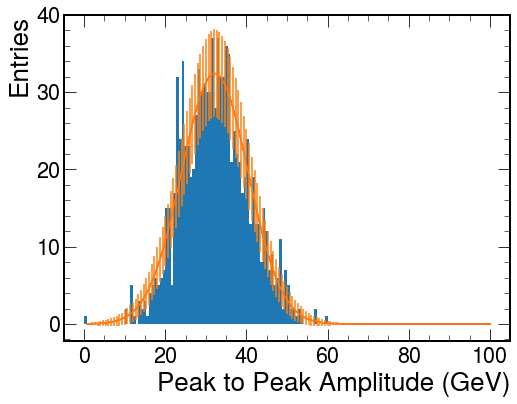

In [53]:
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
fig = plt.figure( figsize=(8, 6), facecolor='w')
hist_data, bins, patches = plt.hist(peaktopeak, bins=500 - 350, range=[0, 100])
x = np.linspace(bins[1], bins[-1], 500 - 350)
y = hist_data
popt, pcov = curve_fit(gaussian, x, y, p0=(250, 250, 37.158))
resolution = peaktopeak
y = gaussian(x, *popt)
plt.plot(x, y, color='r')
plt.xlabel('Peak to Peak Amplitude (GeV)')
plt.ylabel('Entries')
plt.errorbar(x,y,yerr=np.sqrt(y))